# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

 # Download Stopwords

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# 2. Load Dataset

In [4]:
df = pd.read_csv("C:\\Users\\mohan\\Downloads\\sms_spam_detection\\spam_detection_dataset\\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# 3. Data Preprocessing

In [5]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(clean_text)

# 4. Feature Extraction

In [6]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})

# 5. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Train Model

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 7. Evaluate Model

In [9]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# 8. Confusion Matrix

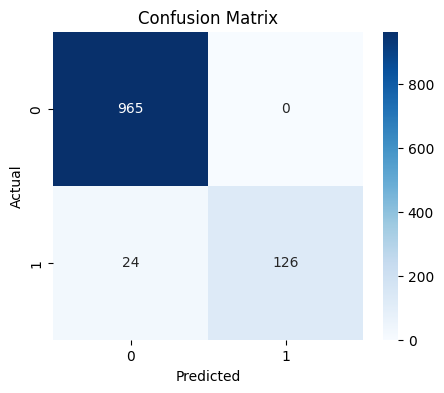

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 9. Save Model & Vectorizer

In [13]:
pickle.dump(model, open('C:\\Users\\mohan\\Downloads\\sms_spam_detection\\model\\spam_model.pkl', 'wb'))
pickle.dump(tfidf, open('C:\\Users\\mohan\\Downloads\\sms_spam_detection\\model\\vectorizer.pkl', 'wb'))
print("✅ Model and Vectorizer saved successfully.")

✅ Model and Vectorizer saved successfully.
